# Sentiment Analysis of Nausicaa

In [54]:
# Imports
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import re 


## Cleaning the Script and Extracting Character Lines

In [55]:
script_dict = {
    "NAUSICAA": [],
    "JHIL": [],
    "MITO": [],
    "YUPA": [],
    "GRNDMOTHR": [],
    "ASBEL": [],
    "KUSHANA": [],
    "KUROTOWA": [],
    "GOLL": [],
    "UNCLE": [],
    "OTHER": []
}

other_characters = [
     "OLD UNCLE", "CHILD", "VILLAGER", "TOETO", "OLD WOMAN", "VOICE",
    "RASTEL", "MAN", "BOY", "GIRL", "WOMAN", "SOLDIER", "GAURD",
    "RADIO", "PILOT", "LEADER"
]

def parse_script(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    current_character = None
    for idx, line in enumerate(lines, start=1):
        line = line.strip()
        
        if not line:  # Empty line
            continue
        
        for name in script_dict.keys():
            if line.startswith(name):
                current_character = name
                script_dict[current_character].append(f"<{idx}> {line}")
                break
        else:
            for name in other_characters:
                if line.startswith(name):
                    current_character = "OTHER"
                    script_dict["OTHER"].append(f"<{idx}> {line}")
                    break
            else:
                if current_character:
                    script_dict[current_character][-1] += f" {line}" 

parse_script("../Scripts/NausicaaNOMETA.txt")

# Print the parsed lines
def print_script():
    for name, lines in script_dict.items():
        print(f"{name}:")
        for line in lines:
            print(line)
        print()

print_script()
# Print out the length of each character's lines
for name, lines in script_dict.items():
    print(f"{name}: {len(lines)} lines")



NAUSICAA:
<24> NAUSICAA  A path of an Ohmu...  It's still fresh...  (She follows the track)
<25> NAUSICAA  A cast-off skin [ALT: shell; exuviae] of an Ohmu...  How magnificent...!  This is the first time I've ever seen a perfectly shed skin.  (She taps the shell with her ceramic sword)
<28> NAUSICAA  Good sound...  (She strikes the shell; the sword does not causes any significant cut)
<30> NAUSICAA  The ceramic sword got chipped.  The Valley people will be happy. They wouldn't have to worry about materials to make tools out of for quite some time.
<33> NAUSICAA  An amazing eye...  Maybe I can fly back with this one...  She frees the eye covering)
<35> NAUSICAA  Ah, got it!  How light <it is>! (Spores are falling in snow-like fashion)
<39> NAUSICAA  The mushibayashi [a plant name] is spreading its afternoon spores. How beautiful... <even> though this place is a forest of death where, if not for this mask, my lungs would decay in five minutes. [pause] ...!!    Who is it?!  [pause]  What 

In [56]:

all_lines_ordered = []

for character, lines in script_dict.items():
    for entry in lines:
        match = re.match(r"<(\d+)>", entry)
        if match:
            idx = int(match.group(1))
            text = entry.split(">", 1)[1].strip()
            all_lines_ordered.append((idx, character, text))

all_lines_ordered.sort()
all_lines_array = [f" {line}" for idx, name, line in all_lines_ordered]
all_lines_array[:10], len(all_lines_array)


([' YUPA      Another village has died...',
  ' YUPA      Let\'s go...  This place, too, will soon sink into the Fukai. -------------------------------- INSET     1000 years after the collapse of a giant industrial civilization, rust and ceramic fragments covered the land.  Over this wasteland, a deadly forest of fungi that released poisonous vapors (miasmas), which came to be called the "Fukai" (Spoiled Sea), spread and was threatening the very existence of the declining human race. Title: Kaze no Tani no Nausicaa  (Nausicaa of the Valley of the Wind) ---------------------------- (Nausicaa is flying over the wasteland on her glider, Mehve.  She lands at the edge of Fukai and enters the forest)',
  " NAUSICAA  A path of an Ohmu...  It's still fresh...  (She follows the track)",
  " NAUSICAA  A cast-off skin [ALT: shell; exuviae] of an Ohmu...  How magnificent...!  This is the first time I've ever seen a perfectly shed skin.  (She taps the shell with her ceramic sword)",
  ' NAUSICAA  G

## Complete Movie Sentiment Analysis

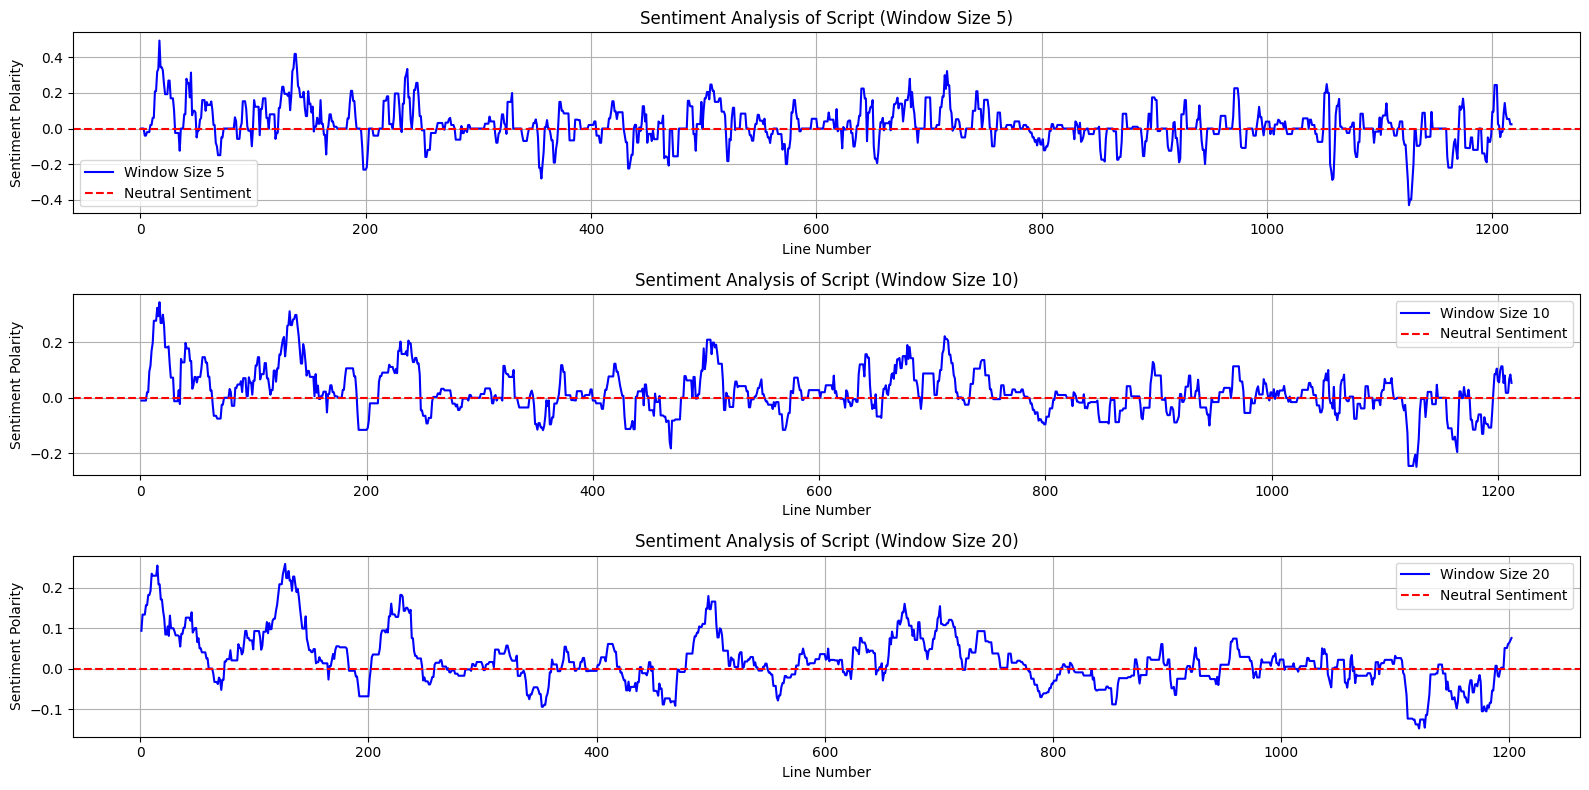

In [57]:
def analyze_sentiment(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file if line.strip()]  
    
    # Perform sentiment analysis
    sentiment_scores = [TextBlob(line).sentiment.polarity for line in lines]
    line_numbers = list(range(1, len(sentiment_scores) + 1))

    # Smooth the sentiment scores
    window_sizes = [5, 10, 20]
    smoothed_scores = {
        f"Window Size {w}": np.convolve(sentiment_scores, np.ones(w)/w, mode='valid')
        for w in window_sizes
    }

    plt.figure(figsize=(16, 8))
    
    for i, (label, scores) in enumerate(smoothed_scores.items(), start=1):
        plt.subplot(3, 1, i)
        smoothed_line_numbers = line_numbers[:len(scores)]
        plt.plot(smoothed_line_numbers, scores, label=label, color="blue", linestyle="-")
        plt.axhline(0, color="red", linestyle="--", label="Neutral Sentiment")
        plt.title(f"Sentiment Analysis of Script ({label})")
        plt.xlabel("Line Number")
        plt.ylabel("Sentiment Polarity")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

analyze_sentiment("../Scripts/NausicaaNOMETA.txt")


## Select Character Sentiment Analysis

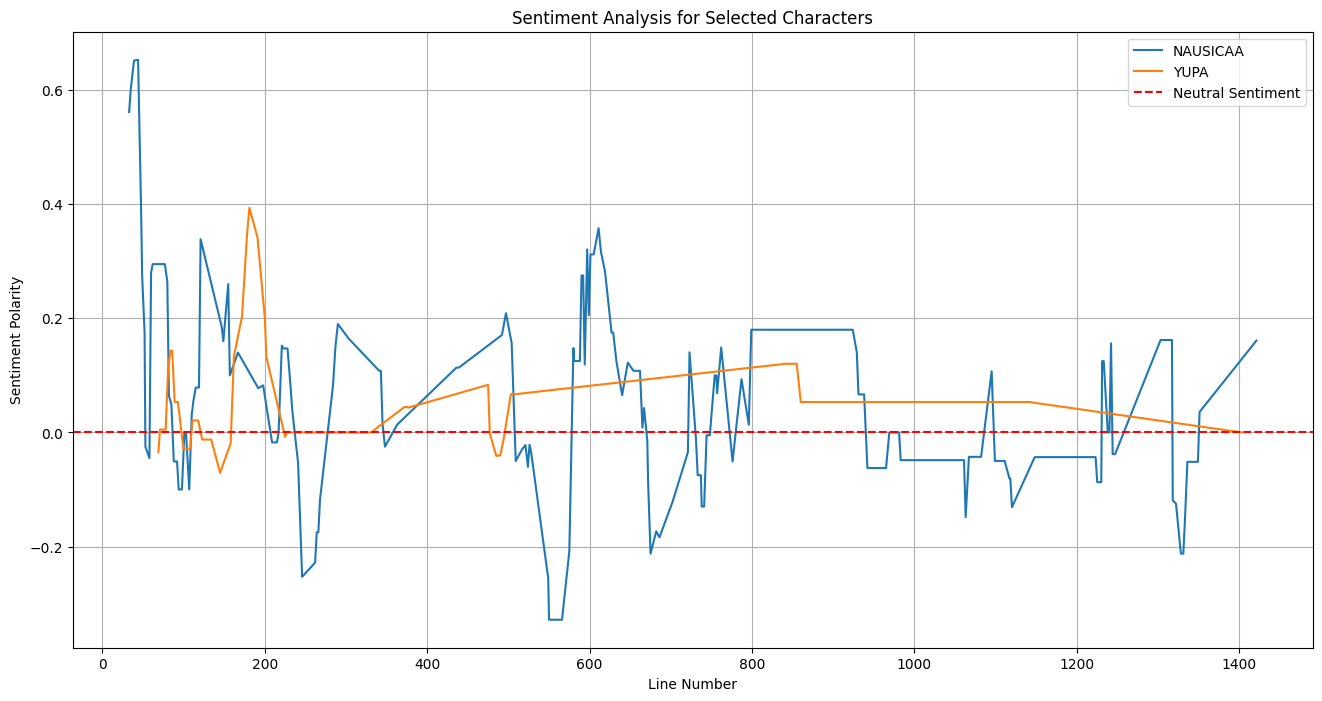

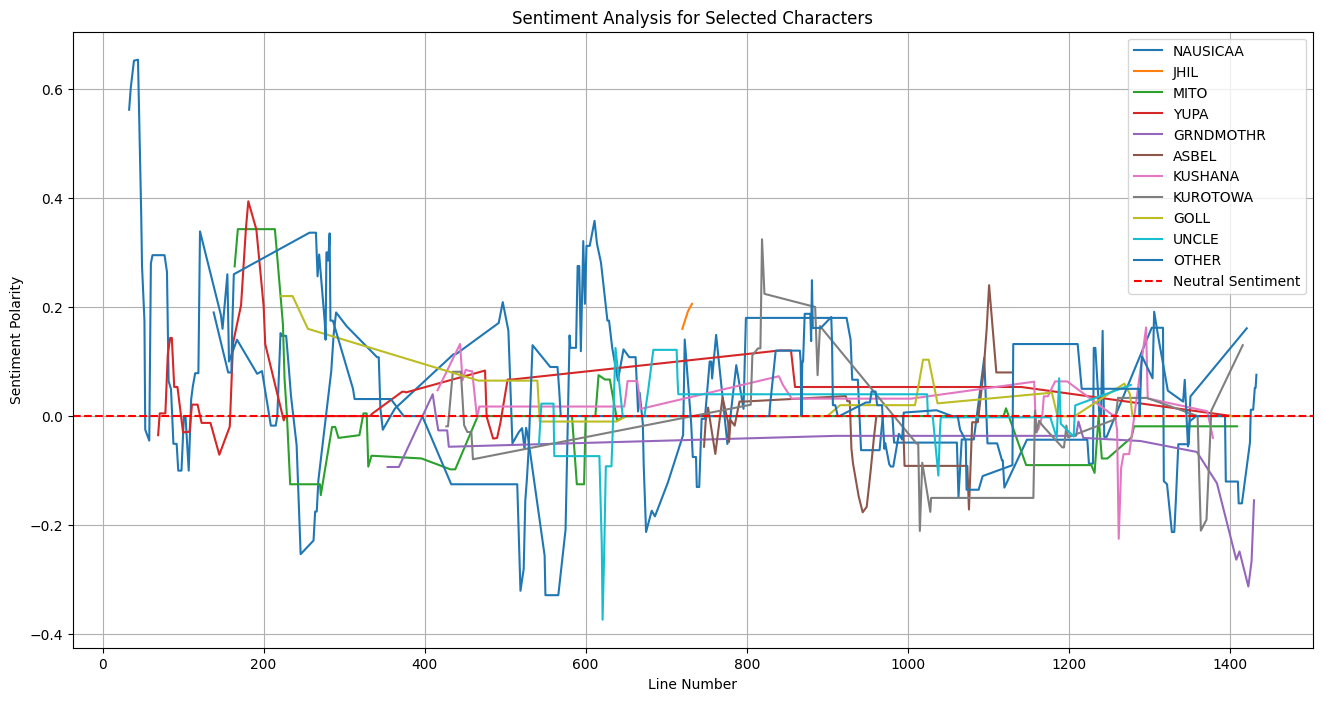

In [58]:

def analyze_characters_sentiment(script_dict, characters_to_plot):
    plt.figure(figsize=(16, 8))
    
    for character in characters_to_plot:
        
        line_numbers = []
        sentiments = []
        for line in script_dict[character]:

            line_number, text = line.split(">", 1)
            line_number = int(line_number.strip("<"))
            line_numbers.append(line_number)
            
            sentiment = TextBlob(text).sentiment.polarity
            sentiments.append(sentiment)
        
        window_size = 5
        smoothed_sentiments = np.convolve(sentiments, np.ones(window_size)/window_size, mode='valid')
        smoothed_line_numbers = line_numbers[window_size - 1:len(smoothed_sentiments) + window_size - 1]

        plt.plot(smoothed_line_numbers, smoothed_sentiments, label=character)

    plt.axhline(0, color="red", linestyle="--", label="Neutral Sentiment")
    plt.title("Sentiment Analysis for Selected Characters")
    plt.xlabel("Line Number")
    plt.ylabel("Sentiment Polarity")
    plt.legend()
    plt.grid(True)
    plt.show()



analyze_characters_sentiment(script_dict, ["NAUSICAA", "YUPA"])
analyze_characters_sentiment(script_dict, script_dict.keys())

## Select Character Sentiment Analysis (with smoothing)

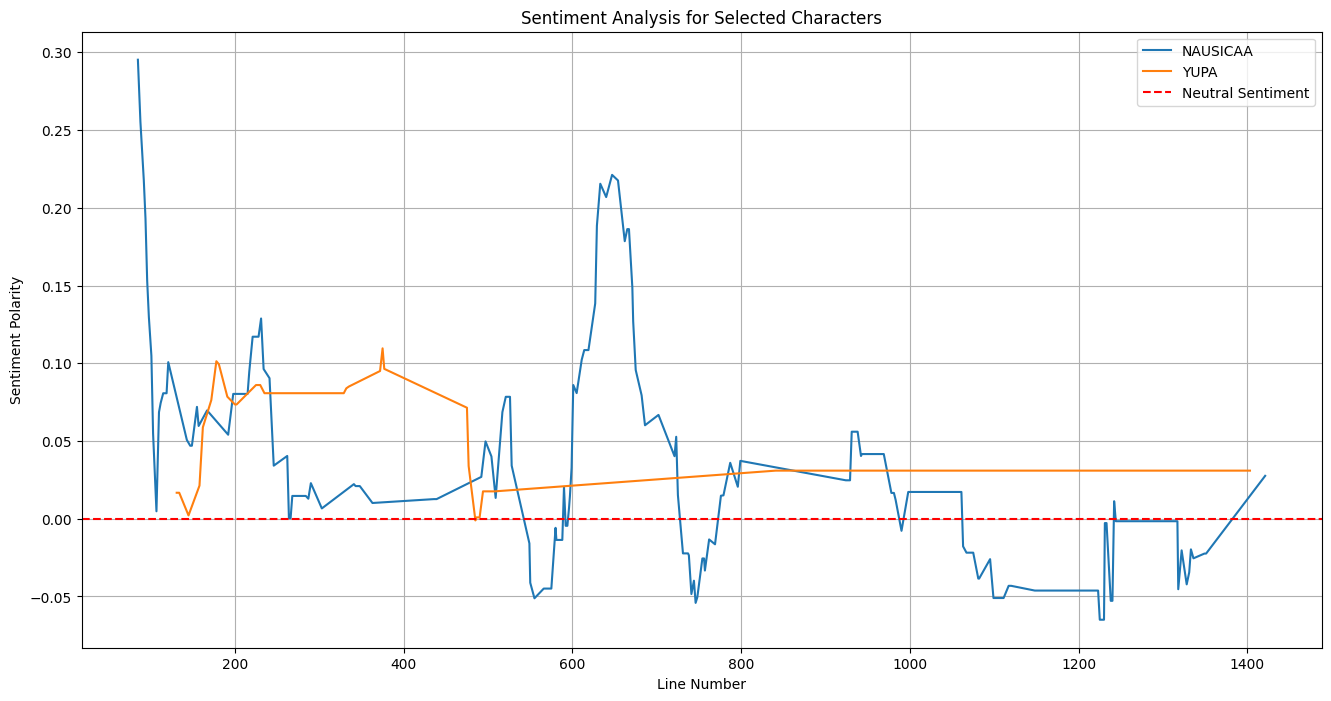

Not enough data points for JHIL to apply smoothing with window size 10. Skipping...


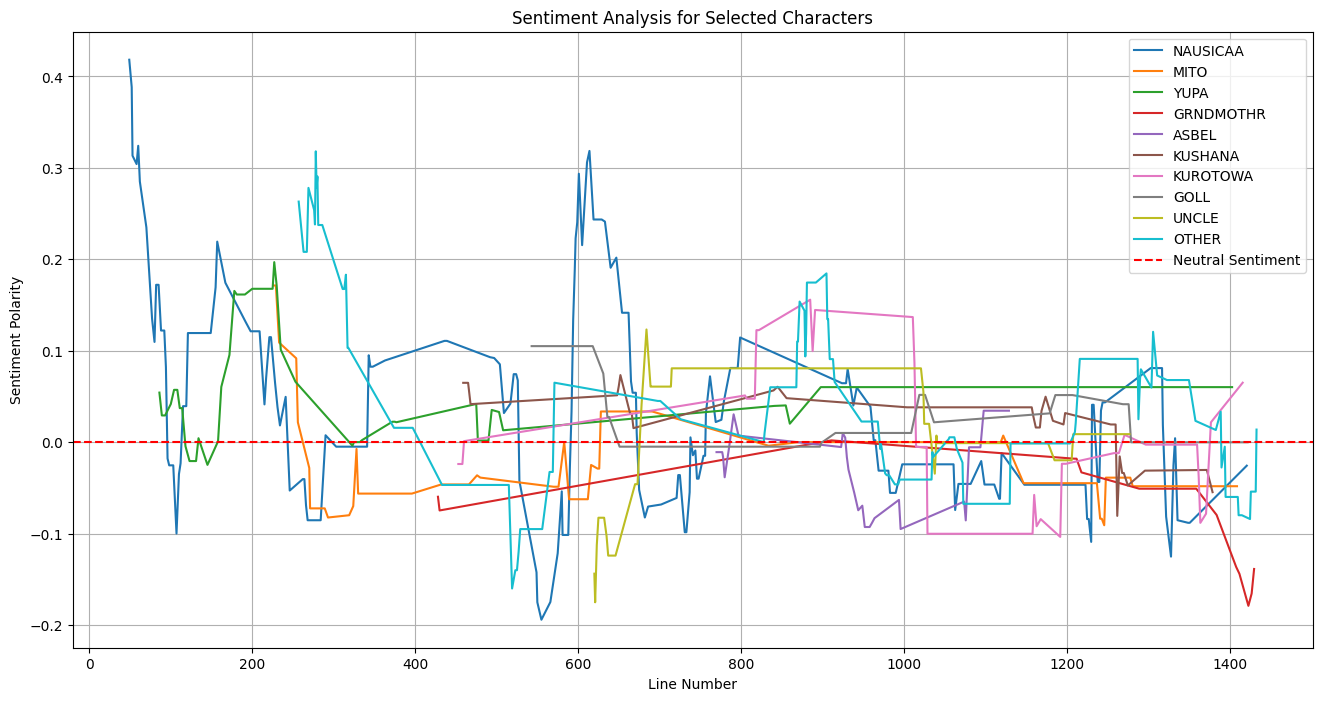

In [59]:
def analyze_characters_sentiment(script_dict, characters_to_plot, smoothing_window=5):
    plt.figure(figsize=(16, 8))
    
    for character in characters_to_plot:
        if character not in script_dict or not script_dict[character]:  
            print(f"No lines found for {character}. Skipping...")
            continue
        
        line_numbers = []
        sentiments = []
        for line in script_dict[character]:

            line_number, text = line.split(">", 1)
            line_number = int(line_number.strip("<"))
            line_numbers.append(line_number)
            
            sentiment = TextBlob(text).sentiment.polarity
            sentiments.append(sentiment)
        
        if len(sentiments) < smoothing_window:
            print(f"Not enough data points for {character} to apply smoothing with window size {smoothing_window}. Skipping...")
            continue
        
        smoothed_sentiments = np.convolve(sentiments, np.ones(smoothing_window)/smoothing_window, mode='valid')
        smoothed_line_numbers = line_numbers[smoothing_window - 1:len(smoothed_sentiments) + smoothing_window - 1]

        plt.plot(smoothed_line_numbers, smoothed_sentiments, label=character)

    plt.axhline(0, color="red", linestyle="--", label="Neutral Sentiment")
    plt.title("Sentiment Analysis for Selected Characters")
    plt.xlabel("Line Number")
    plt.ylabel("Sentiment Polarity")
    plt.legend()
    plt.grid(True)
    plt.show()


analyze_characters_sentiment(script_dict, ["NAUSICAA", "YUPA"], smoothing_window=20)
analyze_characters_sentiment(script_dict, script_dict.keys(), smoothing_window=10)

## Participation Vector Smoothing

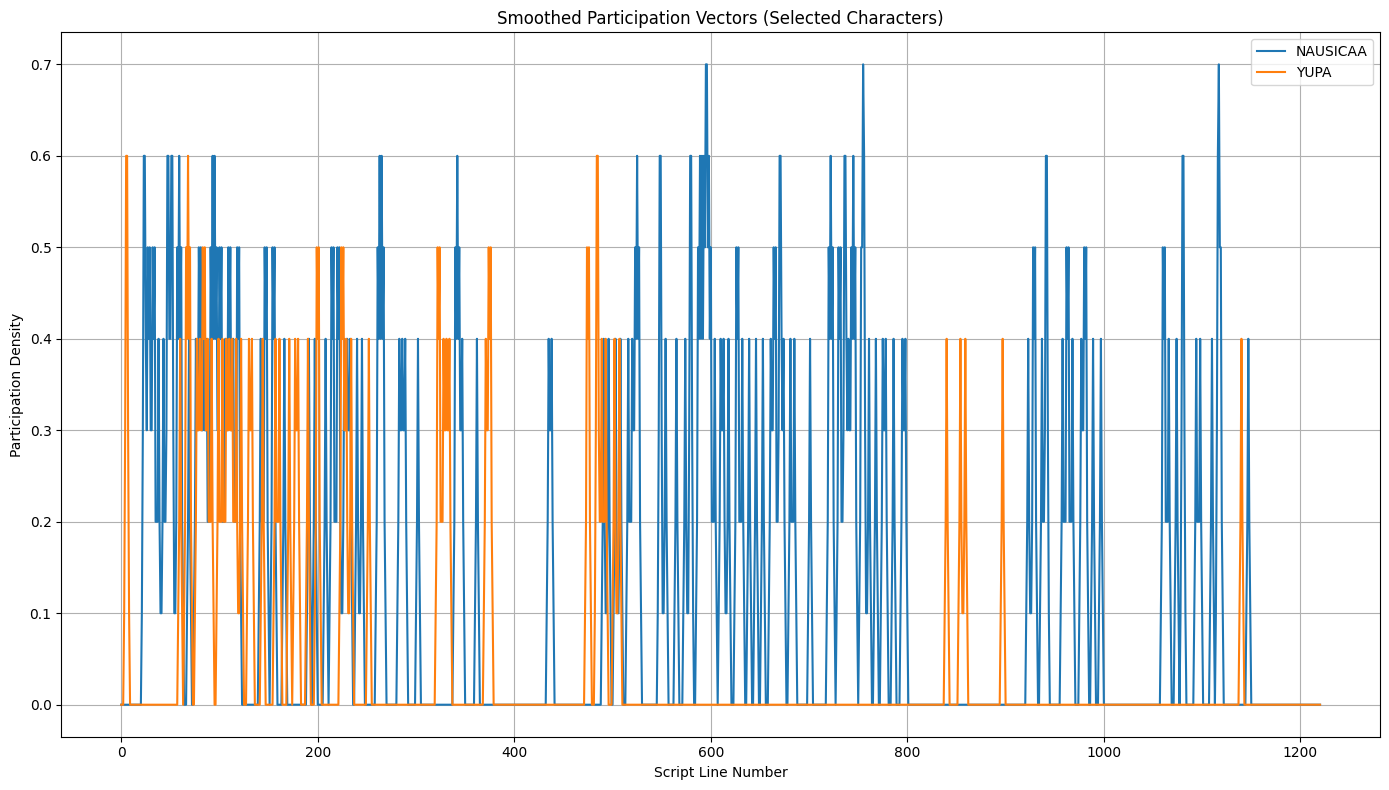

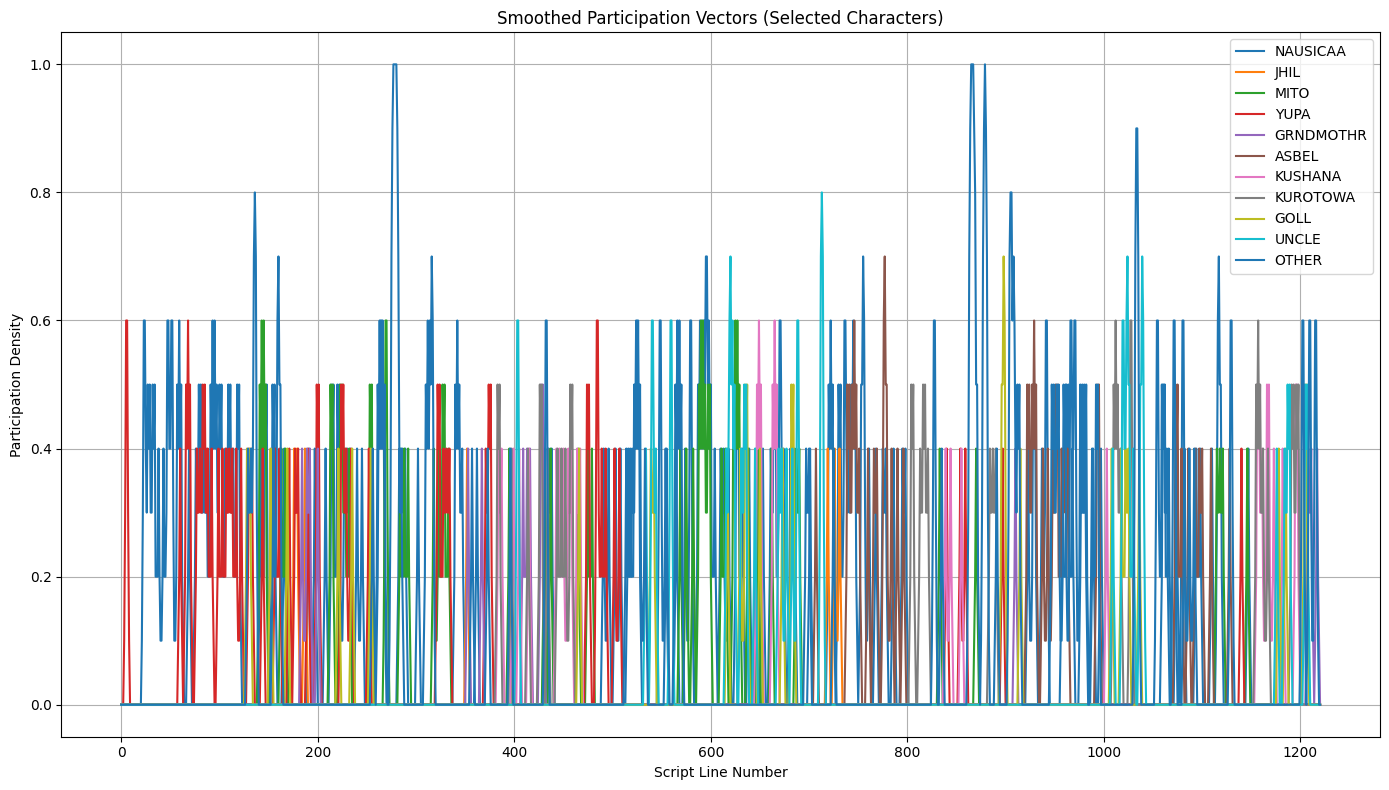

In [60]:
def plot_selected_participation(script_dict, total_lines, kernel, characters_to_plot):
    plt.figure(figsize=(14, 8))
    
    for character in characters_to_plot:
        if character not in script_dict:
            print(f"Warning: Character '{character}' not found in script_dict.")
            continue
        
        P = np.zeros(total_lines)
        for line in script_dict[character]:
            if line.startswith("<") and ">" in line:
                line_num = int(line[1:line.index(">")])
                if 0 < line_num <= total_lines:
                    P[line_num - 1] = 1
        
        P_smooth = np.convolve(P, kernel, mode='same')
        plt.plot(P_smooth, label=character)

    plt.title("Smoothed Participation Vectors (Selected Characters)")
    plt.xlabel("Script Line Number")
    plt.ylabel("Participation Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

kernel = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
plot_selected_participation(script_dict, 1221, kernel, ["NAUSICAA", "YUPA"])
plot_selected_participation(script_dict, 1221, kernel, script_dict.keys())

## PCA Plot Showing Sentiment Dynamics Over Script
- PC1 (blue) captures the dominant sentiment trend shaped by all characters.
- PC2 (green) likely reflects contrastive patterns — for example, moments when emotionally divergent characters (like Nausicaa vs. Kushana) interact.

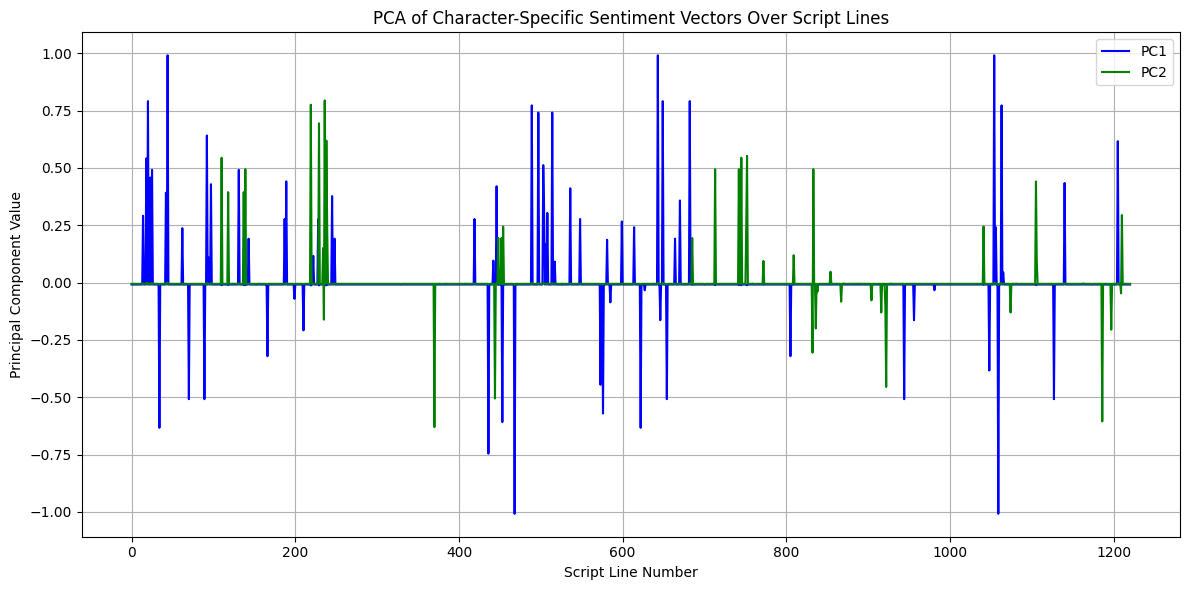

In [61]:


script_dict = {
    "NAUSICAA": [], "JHIL": [], "MITO": [], "YUPA": [], "GRNDMOTHR": [],
    "ASBEL": [], "KUSHANA": [], "KUROTOWA": [], "GOLL": [], "UNCLE": [], "OTHER": []
}
other_characters = [
    "OLD UNCLE", "CHILD", "VILLAGER", "TOETO", "OLD WOMAN", "VOICE",
    "RASTEL", "MAN", "BOY", "GIRL", "WOMAN", "SOLDIER", "GUARD",
    "RADIO", "PILOT", "LEADER"
]

# Reparse
with open("../Scripts/NausicaaNOMETA.txt", 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file if line.strip()]
    total_lines = len(lines)

    current_character = None
    for idx, line in enumerate(lines, start=1):
        for name in script_dict.keys():
            if line.startswith(name):
                current_character = name
                script_dict[current_character].append(f"<{idx}> {line}")
                break
        else:
            for name in other_characters:
                if line.startswith(name):
                    current_character = "OTHER"
                    script_dict["OTHER"].append(f"<{idx}> {line}")
                    break
            else:
                if current_character:
                    script_dict[current_character][-1] += f" {line}"

sentiment_vector = np.array([TextBlob(line).sentiment.polarity for line in lines])

# Participation matrix
characters = list(script_dict.keys())
P_matrix = np.zeros((len(characters), total_lines))

for i, char in enumerate(characters):
    for line in script_dict[char]:
        if line.startswith("<") and ">" in line:
            line_num = int(line[1:line.index(">")])
            if 0 < line_num <= total_lines:
                P_matrix[i, line_num - 1] = 1

character_sentiments = P_matrix * sentiment_vector

X = character_sentiments.T
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.plot(X_pca[:, 0], label="PC1", color="blue")
plt.plot(X_pca[:, 1], label="PC2", color="green")
plt.title("PCA of Character-Specific Sentiment Vectors Over Script Lines")
plt.xlabel("Script Line Number")
plt.ylabel("Principal Component Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_35002/1151139139.py:74: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sentiment_series = pd.Series(sentiment_vals).fillna(method="ffill").fillna(method="bfill")
/tmp/ipykernel_35002/1151139139.py:113: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(new_phase_ranges))


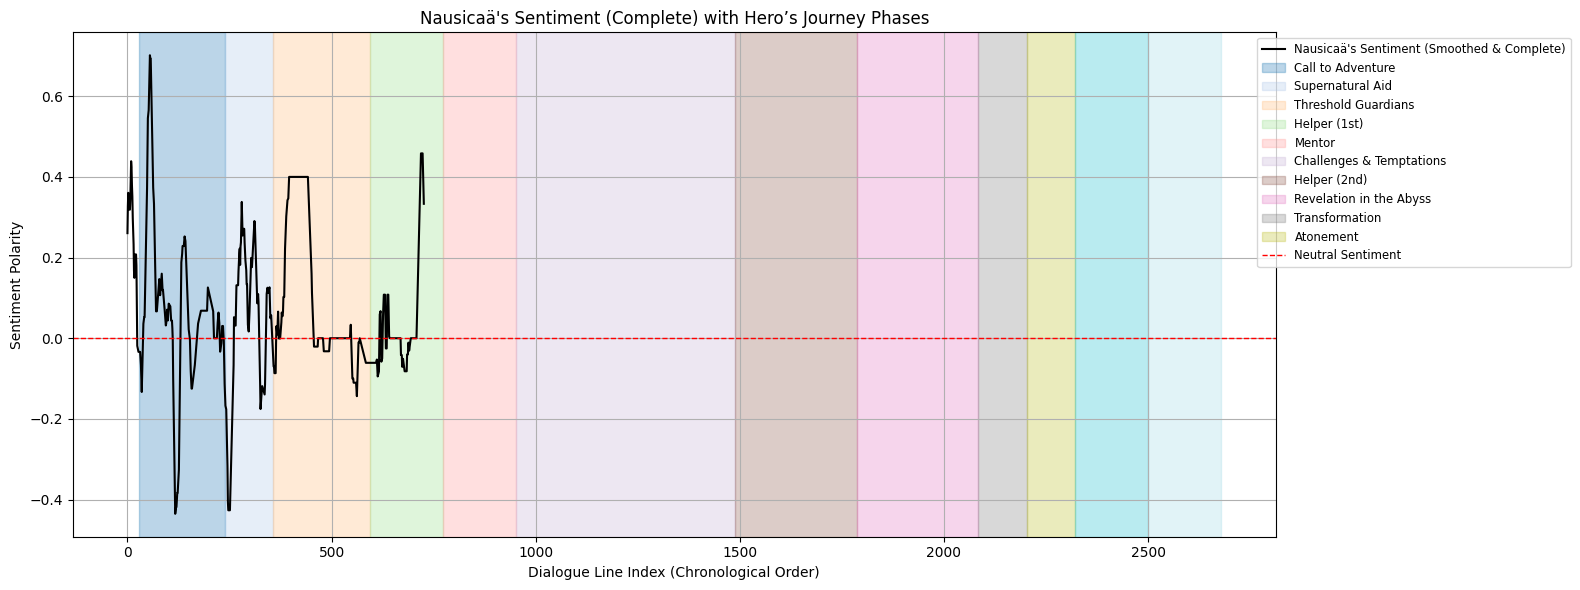

NAUSICAA: 180 lines
  <23> NAUSICAA  A path of an Ohmu...  It's still fresh...  (She follows the track)
  <24> NAUSICAA  A cast-off skin [ALT: shell; exuviae] of an Ohmu...  How magnificent...!  This is the first time I've ever seen a perfectly shed skin.  (She taps the shell with her ceramic sword)
  <27> NAUSICAA  Good sound...  (She strikes the shell; the sword does not causes any significant cut)
  <29> NAUSICAA  The ceramic sword got chipped.  The Valley people will be happy. They wouldn't have to worry about materials to make tools out of for quite some time.
  <32> NAUSICAA  An amazing eye...  Maybe I can fly back with this one...  She frees the eye covering)
  <34> NAUSICAA  Ah, got it!  How light <it is>! (Spores are falling in snow-like fashion)
  <38> NAUSICAA  The mushibayashi [a plant name] is spreading its afternoon spores. How beautiful... <even> though this place is a forest of death where, if not for this mask, my lungs would decay in five minutes. [pause] ...!!    Who

In [62]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the cleaned script file
script_path = "../Scripts/NausicaaNOMETA.txt"
with open(script_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# ------------------------------
# STEP 1: PARSE TO script_dict
# ------------------------------
script_dict = {
    "NAUSICAA": [],
    "JHIL": [], "MITO": [], "YUPA": [], "GRNDMOTHR": [],
    "ASBEL": [], "KUSHANA": [], "KUROTOWA": [],
    "GOLL": [], "UNCLE": [], "OTHER": []
}
other_characters = [
    "OLD UNCLE", "CHILD", "VILLAGER", "TOETO", "OLD WOMAN", "VOICE",
    "RASTEL", "MAN", "BOY", "GIRL", "WOMAN", "SOLDIER", "GAURD",
    "RADIO", "PILOT", "LEADER", "GUARD", "LOOKOUT", "MOTHER", "LIEUTENNT"
]

def parse_script_to_dict(lines):
    current_character = None
    for idx, line in enumerate(lines):
        line = line.strip()
        if not line:
            continue
        for name in script_dict:
            if line.startswith(name):
                current_character = name
                script_dict[current_character].append(f"<{idx}> {line}")
                break
        else:
            for name in other_characters:
                if line.startswith(name):
                    current_character = "OTHER"
                    script_dict["OTHER"].append(f"<{idx}> {line}")
                    break
            else:
                if current_character:
                    script_dict[current_character][-1] += f" {line}"

parse_script_to_dict(lines)

# ------------------------------
# STEP 2: Build dialogue sequence
# ------------------------------
dialogue_sequence = []
for character, entries in script_dict.items():
    for entry in entries:
        match = re.match(r"<(\d+)>", entry)
        if match:
            idx = int(match.group(1))
            text = entry.split(">", 1)[1].strip()
            dialogue_sequence.append((idx, character, text))
dialogue_sequence.sort()

# ------------------------------
# STEP 3: Sentiment analysis
# ------------------------------
sentiment_vals = []
for _, speaker, text in dialogue_sequence:
    if speaker == "NAUSICAA":
        sentiment_vals.append(TextBlob(text).sentiment.polarity)
    else:
        sentiment_vals.append(np.nan)

# Fill all gaps so sentiment spans full script
sentiment_series = pd.Series(sentiment_vals).fillna(method="ffill").fillna(method="bfill")
smoothed_sentiments = np.convolve(sentiment_series.to_numpy(), np.ones(15) / 15, mode="same")

# ------------------------------
# STEP 4: Hero’s Journey Phase Mapping
# ------------------------------
journey_phases = {
    "Call to Adventure": (50, 400),
    "Supernatural Aid": (400, 600),
    "Threshold Guardians": (600, 1000),
    "Helper (1st)": (1000, 1300),
    "Mentor": (1300, 1600),
    "Challenges & Temptations": (1600, 2500),
    "Helper (2nd)": (2500, 3000),
    "Revelation in the Abyss": (3000, 3500),
    "Transformation": (3500, 3700),
    "Atonement": (3700, 3900),
    "Gift of the Goddess": (3900, 4200),
    "Return": (4200, 4500)
}

total_reference_lines = 1221
dialogue_length = len(dialogue_sequence)

# Map phase windows proportionally to dialogue index
new_phase_ranges = {}
for phase, (old_start, old_end) in journey_phases.items():
    prop_start = old_start / total_reference_lines
    prop_end = old_end / total_reference_lines
    new_start = int(prop_start * dialogue_length)
    new_end = int(prop_end * dialogue_length)
    new_phase_ranges[phase] = (new_start, new_end)

# ------------------------------
# STEP 5: Plot it all
# ------------------------------
plt.figure(figsize=(16, 6))
plt.plot(smoothed_sentiments, color="black", label="Nausicaä's Sentiment (Smoothed & Complete)")

colors = plt.cm.get_cmap("tab20", len(new_phase_ranges))
for i, (phase, (start, end)) in enumerate(new_phase_ranges.items()):
    plt.axvspan(start, end, color=colors(i), alpha=0.3, label=phase if i < 10 else None)

plt.axhline(0, color="red", linestyle="--", linewidth=1, label="Neutral Sentiment")
plt.title("Nausicaä's Sentiment (Complete) with Hero’s Journey Phases")
plt.xlabel("Dialogue Line Index (Chronological Order)")
plt.ylabel("Sentiment Polarity")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1), fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()

# I want to see key/value pairs in the script_dict
for character, entries in script_dict.items():
    print(f"{character}: {len(entries)} lines")
    for entry in entries:
        print(f"  {entry}")
    print()
